In [1]:
import numpy as np
import scipy as sc
from scipy import signal
import math
import cmath
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True

# Q1

In [6]:
fp = [1/8,1/4,1/3]
fs = [1/6,1/5,5/12]
# fp = np.array(fp)

total = np.array(fp) + np.array(fs)
print(total)

[0.29166667 0.45       0.75      ]


value of M : 55


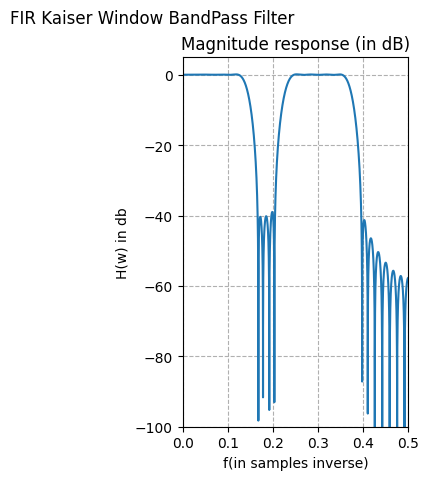

In [15]:
# according to  question 
fp = [1/8,1/4,1/3]
fs = [1/6,1/5,5/12]
# fp = np.array(fp)

F_cutoff_norm = np.array(fp) + np.array(fs)



ripple = 40
width = 2*(fs[0]-fp[0])

Omega_s = 1

M, beta = signal.kaiserord(ripple, width)

print("value of M :",M)

window_coeff = signal.windows.kaiser(M, beta)

filter_coeff = signal.firwin(M, F_cutoff_norm, window = ('kaiser', beta), pass_zero=True)

w, h = signal.freqz(filter_coeff, worN=10000)

w *=Omega_s/(2*math.pi)

mag_response = 20*np.log10(abs(h))


# plt.subplot(1,2,1)
# plt.plot(w,abs(h))
# plt.axis([0, 0.6, 0, 1.25])
# plt.ylabel('H(w)')
# plt.xlabel('w')
# # plt.xticks(np.arange(0,110,10))
# # plt.yticks(np.arange(0,1.25,0.25))
# # plt.hlines(10**(-1.75), 0, 100, 'r', 'dotted')
# # plt.hlines(0, 0, 30, 'sienna', 'dotted')
# # plt.hlines(0, 70, 100, 'sienna', 'dotted')
# # plt.hlines(1, 30, 70, 'sienna', 'dotted')
# # plt.vlines(30, 0, 1, 'sienna', 'dotted')
# # plt.vlines(70, 0, 1, 'sienna', 'dotted')
# plt.title('Magnitude response (linear scale)')
# plt.grid(linestyle='dashed')

plt.subplot(1,2,2)
plt.plot(w,mag_response)
plt.axis([0, 0.5, -100, 5])
plt.ylabel('H(w) in db')
plt.xlabel('f(in samples inverse)')
# plt.xticks(np.arange(0,4,1))
# plt.yticks(np.arange(-100,10,10))
# plt.hlines(-35, 0, 100, 'r', 'dotted')
# plt.hlines(-100, 0, 30, 'sienna', 'dotted')
# plt.hlines(-100, 70, 100, 'sienna', 'dotted')
# plt.hlines(0, 30, 70, 'sienna', 'dotted')
# plt.vlines(30, -100, 0, 'sienna', 'dotted')
# plt.vlines(70, -100, 0, 'sienna', 'dotted')
plt.title('Magnitude response (in dB)')
plt.grid(linestyle='dashed')

plt.suptitle('FIR Kaiser Window BandPass Filter')
plt.show() 

# Q2

value of M : 25


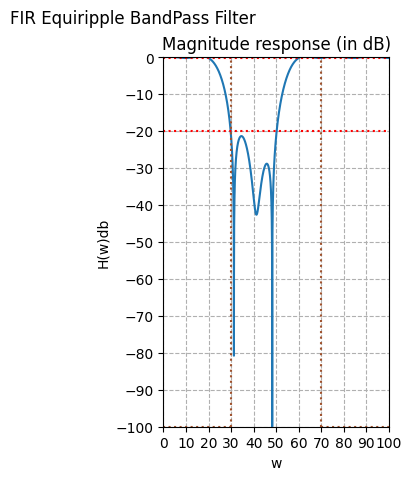

In [14]:
Omega_s= 200
Omega_p = np.array([20, 60])
Omega_stop = np.array([30, 50])

#Calculating ripples for the weight
stop_ripple_db = 20
pass_ripple_db = 30
stop_ripple = 10**(-stop_ripple_db/20)
pass_ripple = 10**(-pass_ripple_db/20)
ripple = max(stop_ripple,pass_ripple)
stop_ripple = ripple/stop_ripple
pass_ripple = ripple/pass_ripple 
weight = np.array([ pass_ripple, stop_ripple,pass_ripple])

#Calculating M
del_f=min(abs(Omega_stop[0]-Omega_p[0]), abs(Omega_stop[1]- Omega_p[1]))/Omega_s
M = math.ceil((0.5*(stop_ripple_db+pass_ripple_db)-13)/14.6/del_f)+1

M=25
print("value of M :",M)
#Calculating filter specifications for remez
bands = np.multiply([0, Omega_p[0], Omega_stop[0], Omega_stop[1], Omega_p[1], Omega_s/2], 1/Omega_s)
desired = np.array([1, 0, 1])

#Obtaining the filter
filter_coeff = signal.remez(M, bands, desired, weight=weight)
w, h = signal.freqz(filter_coeff, worN=10000)

w *=Omega_s/2/math.pi

mag_response = 20*np.log10(abs(h))




# plt.subplot(1,2,1)
# plt.plot(w,abs(h))
# plt.axis([0, 100, 0, 1.25])
# plt.ylabel('H(w)')
# plt.xlabel('w')
# plt.xticks(np.arange(0,110,10))
# plt.yticks(np.arange(0,1.25,0.25))
# plt.hlines(10**(-stop_ripple_db/20), 0, Omega_s/2, 'r', 'dotted')
# plt.hlines(1+10**(-pass_ripple_db/20), 0, Omega_s/2, 'r', 'dotted')
# plt.hlines(1-10**(-pass_ripple_db/20), 0, Omega_s/2, 'r', 'dotted')
# plt.hlines(0, 0, 30, 'sienna', 'dotted')
# plt.hlines(0, 70, 100, 'sienna', 'dotted')
# plt.hlines(1, 30, 70, 'sienna', 'dotted')
# plt.vlines(30, 0, 1, 'sienna', 'dotted')
# plt.vlines(70, 0, 1, 'sienna', 'dotted')
# plt.title('Magnitude response (linear scale)')
# plt.grid(linestyle='dashed')

plt.subplot(1,2,2)
plt.plot(w,mag_response)
plt.axis([0, 100, -100, 0])
plt.ylabel('H(w)db')
plt.xlabel('w')
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(-100,10,10))
plt.hlines(-stop_ripple_db, 0, Omega_s/2, 'r', 'dotted')
plt.hlines(20*math.log10(1+10**(-pass_ripple_db/20)), 0, Omega_s/2, 'r', 'dotted')
plt.hlines(20*math.log10(1-10**(-pass_ripple_db/20)), 0, Omega_s/2, 'r', 'dotted')
plt.hlines(-100, 0, 30, 'sienna', 'dotted')
plt.hlines(-100, 70, 100, 'sienna', 'dotted')
plt.hlines(0, 30, 70, 'sienna', 'dotted')
plt.vlines(30, -100, 0, 'sienna', 'dotted')
plt.vlines(70, -100, 0, 'sienna', 'dotted')
plt.title('Magnitude response (in dB)')
plt.grid(linestyle='dashed')

plt.suptitle('FIR Equiripple BandPass Filter')
plt.show() 